In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from public_tests import *
%matplotlib inline

In [2]:
# load the dataset
x_train, y_train = load_data()

In [3]:
x_train

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [4]:
x_train.shape

(97,)

In [5]:
y_train

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [6]:
y_train.shape

(97,)

In [7]:
type(x_train)

numpy.ndarray

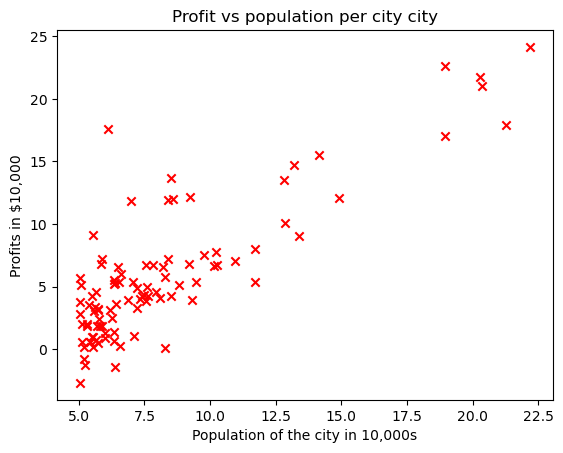

In [9]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profit vs population per city city")
plt.ylabel("Profits in $10,000")
plt.xlabel("Population of the city in 10,000s")
plt.show()

In [10]:
class model:
    def __init__(this, w=0.0, b=0.0):
        this.w = w
        this.b = b
    def __str__(this):
        return f"w = {this.w}, b={this.b}"

linear_model = model()
print(linear_model)

w = 0.0, b=0.0


In [11]:
def inference(population, the_model: model):
    predicted_profit = the_model.w * population + the_model.b
    return predicted_profit

In [13]:
def compute_cost(x: np.ndarray, y: np.ndarray, the_model: model) -> float:
    m = x.shape[0]
    
    predicted_profits = np.zeros(m)
    for i in range(m):
        predicted_profits[i] = inference(x[i], the_model)
    
    squared_deviation = (predicted_profits - y)**2

    total_cost = 0
    for i in range(m):
        total_cost += squared_deviation[i]
    
    total_cost /= (2*m)

    return total_cost

In [14]:
compute_cost(x_train, y_train, linear_model)

np.float64(32.072733877455654)

In [15]:
linear_model_2 = model(2, 1)
cost = compute_cost(x_train, y_train, linear_model_2)
print(type(cost))
print(f"Cost at initial w: {cost:.3f}")

# Public tests
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!
